In [6]:
import numpy as np
x = var("x")

### Система точек, к которой выполняется приближение:

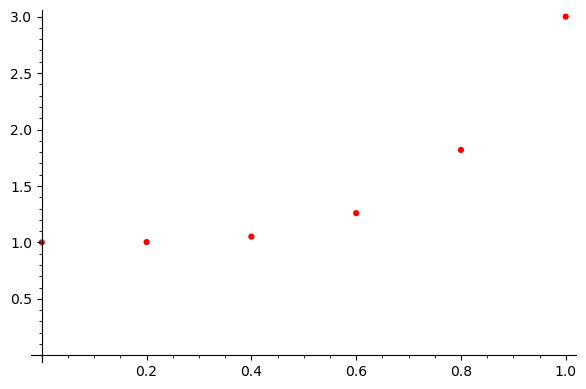

In [3]:
pts = [[0.0,1.0],
       [0.2,1.0032],
       [0.4,1.0512],
       [0.6,1.2592],
       [0.8,1.8192],
       [1.0,3.0]]

plt = point(pts[0],color = "red",size = 20)
for i in range(1, len(pts)):
    plt += point(pts[i],color = "red",size = 20) 
show(plt,ymin = 0)

Функция, реализующая мнк

In [1]:
def Least_squares(pts,n): #порядок приближаемой функции    
    
    N = len(pts) #число точек

    ptsA = np.array(pts)
    X = ptsA[:,0]
    Y = ptsA[:,1]
    n+=1

    names = "" #инициализация переменных
    for i in range (n):
        names += "a" + (str(i)) + " "
    a = var(names)
    
    eqsys = [] #построение системы

    for k in range (n):
        eqls = 0
        eqrs = 0
        for i in range(n):
            eqa = 0
            for j in range(N):
                eqa += X[j]**(i+k)

            eqls += a[i]*eqa

        for j in range(N):
            eqrs += Y[j]*(X[j]**k)

        eqsys.append(eqls == eqrs)
        
    sols = solve(eqsys,a) #решение системы
    
    func = 0
    for i in range(len(sols[0])):
        func += sols[0][i].rhs()*x**i
        
    return func

In [5]:
def formt_for_show(pts):
    res = []
    for a in pts:
        res.append((a[0].n(digits = 2),a[1].n(digits = 2)))
    return res 

def points_to_plot(pts):
    pl = point(pts[0],color = "red",size = 20)
    for i in range(1,len(pts)):
        pl += point(pts[i],color = "red",size = 20)
    return pl

def errSqSum(func,pts): #счет квадратов ошибок
    sum = 0
    for i in range(len(pts)):
        sum += (pts[i][1] - func(x = pts[i][0]))**2
    return sum

In [7]:
show(Least_squares(pts,1))

226/125*x + 1159/1875

In [8]:
show(Least_squares(pts,2))

124/35*x^2 - 1518/875*x + 4771/4375

'МНК по системе точек: [(0.00, 1.0), (0.20, 1.0), (0.40, 1.1), (0.60, 1.3), (0.80, 1.8), (1.0, 3.0)]'

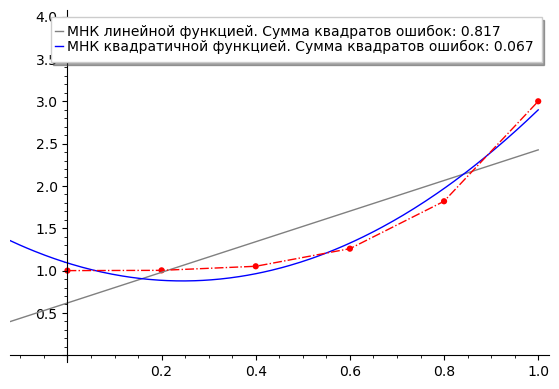

In [6]:
plt = points_to_plot(pts)
  
show("МНК по системе точек: {}".format(formt_for_show(pts)))
show(plt + 
     plot(Least_squares(pts,1),color = "grey",
          legend_label = "МНК линейной функцией. Сумма квадратов ошибок: {}"
          .format(errSqSum(Least_squares(pts,1),pts).n(digits = 3))) +
     plot(Least_squares(pts,2),color = "blue",
          legend_label = "МНК квадратичной функцией. Сумма квадратов ошибок: {}"
          .format(errSqSum(Least_squares(pts,2),pts).n(digits = 2))) +
     line(pts,color  = "red",linestyle = "-."),
     xmin = -0.1,ymin = 0, ymax = 4)

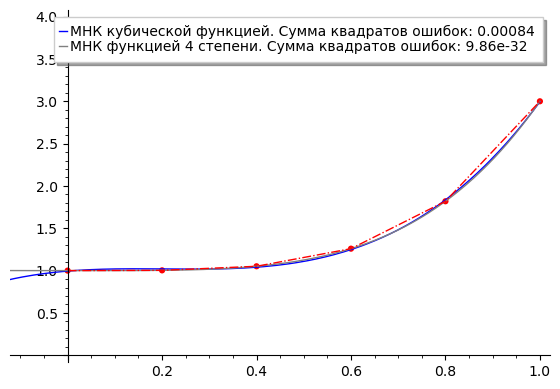

In [7]:
show(plt + 
     plot(Least_squares(pts,3),color = "blue",
          legend_label = "МНК кубической функцией. Сумма квадратов ошибок: {}"
          .format(errSqSum(Least_squares(pts,3),pts).n(digits = 2))) +
     plot(Least_squares(pts,4),color = "grey",
          legend_label = "МНК функцией 4 степени. Сумма квадратов ошибок: {}"
          .format(errSqSum(Least_squares(pts,4),pts).n(digits = 3))) +
     line(pts,color  = "red",linestyle = "-."),
     xmin = -0.1,ymin = 0, ymax = 4)